In [2]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [ ]:
# format date, income, expend, income_type, expend_type

In [3]:
df = pd.read_csv('data2.csv')
df.head()

,date,money,money_typ
0,2017-01-01,-38.289249,Fitness
1,2017-01-02,-1.183553,Fitness
2,2017-01-03,-158.098343,Transport
3,2017-01-04,-74.805991,Shopping
4,2017-01-05,-102.053730,Social


In [54]:

def fit_normal_model(y):
    def logPr(y, theta):
        mu, tau = theta
        sigma =np.exp(tau)
        lik = scipy.stats.norm.pdf(y, loc=mu , scale=sigma)
        return np.log(lik)

    initial_guess = [np.mean(y),np.sqrt(np.var(y))]

    # Plot the fitted density, and a histogram of the actual log10(data)
    # (Using density=True rescales the histogram to have total area
    # equal to 1, making it directly comparable to the fitted density plot.)
    theta_hat = scipy.optimize.fmin(lambda theta: -np.sum(logPr(y,theta)), initial_guess , maxiter=5000)
    plt.hist(income, bins=75, density=True)

    y = np.linspace(0, 500 , num=100)


    f = np.exp(logPr(y,theta_hat)) 
    plt.plot(y, f)
    return theta_hat

Optimization terminated successfully.
         Current function value: 3154.081354
         Iterations: 63
         Function evaluations: 122
Optimization terminated successfully.
         Current function value: 2851.993698
         Iterations: 67
         Function evaluations: 127


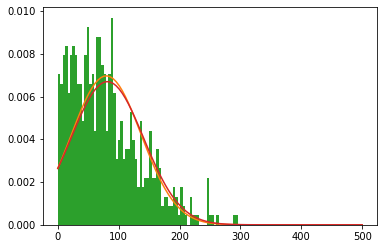

In [67]:
params_in = fit_normal_model(df[df.money>0].money)
params_out = fit_normal_model(np.negative(df[df.money<0].money))
with open ('model_out.txt','w') as out:
    out.write(f"Your average income is {params_in[0]:.3f} and the variance of your income is {params_in[1]:.3f}\n")
    out.write(f"Your average income is {params_out[0]:.3f} and the variance of your income is {params_out[1]:.3f}\n")




Optimization terminated successfully.
         Current function value: 2851.993698
         Iterations: 67
         Function evaluations: 127


array([81.38134813,  4.08684094])

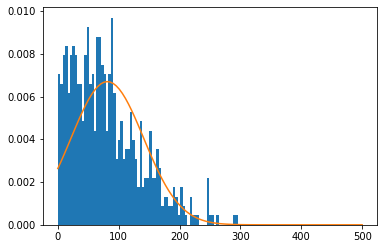

In [77]:
# hypothesis testing, testing if there is enough evidence that the mean of income is the same as the mean of expend

def hypo_testing(x,y):

    # 2. Define the test statistic
    def t(x,y): 
        return np.mean(y) - np.mean(x)
    # 3. To generate a synthetic dataset, assuming H0, ... 
    mu_hat = np.mean(np.concatenate([x,y]))
    sigma_hat = np.sqrt(np.mean((np.concatenate([x,y])-mu_hat)**2))
    # print(mu_hat)
    # print(sigma_hat)
    def rxy_star():
        return (np.random.normal(loc=mu_hat, scale=sigma_hat, size=len(x)), np.random.normal(loc=mu_hat, scale=sigma_hat, size=len(y)))
    # 4. Sample the test statistic, compare to what was observed, and find p-value 
    t_ = np.array([t(*rxy_star()) for _ in range(10000)])
    print(t_)
    plt.hist(t_, bins=60, alpha=.3)
    plt.axvline(x=t(x,y), linestyle='dashed', color='black')
    p = 2*min(np.mean(t_ >= t(x,y)), np.mean(t_ <= t(x,y)))
    return p


[-5.61502043 -1.91092199 -1.90186825 ...  2.14044917 -7.40962047
  1.15839926]
According to our TOTALLY accurate statistical testing, your average income matches your average expend, keep going!


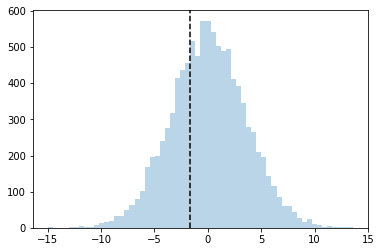

In [79]:
income = np.negative(df[df.money<0].money)
expend = df[df.money>0].money
threshold = 0.05
p = hypo_testing(income, expend)
hypotest_res = ''
if (p < threshold):
    if income.mean()  > expend.mean():
        hypotest_res = 'According to our TOTALLY accurate statistical testing, your average income is larger than your average expend, well done!'
    else:
        hypotest_res = 'According to our TOTALLY accurate statistical testing, your average expend is larger than your average income, consider saving money!'
else:
    hypotest_res = 'According to our TOTALLY accurate statistical testing, your average income matches your average expend, keep going!'
print(hypotest_res)


In [ ]:
# proejction, significance testing, pension


In [ ]:
# risk assessment
# based on your mean spend so far, and how much money you have left. How much time would you have before you 
# use all of your income 



# set a goal, and based on daily income and outcome, how much time the user would need to achive the goal

In [23]:
# given a date, fit the model so far, output how many days user has left before using all of its money
def days_left(d):
    df2 = df.copy()
    df2.date = df.date.apply(date.fromisoformat)
    df_in_thus_far = df2[df2.date <= d][df2.money < 0]
    df_out_thus_far = df2[df2.date <= d][df2.money > 0]
    params_in = fit_normal_model(df_in_thus_far.money)
    params_out = fit_normal_model(df_out_thus_far.money)
    money_left = df2[df2.date <= d].money.sum()
    return money_left / params_out[0]



In [64]:
# set a goal (how much money) 
# based on current income and expend so far, calculate how many days needed to achieve the goal
def days_needed(goal, d):
    df2 = df.copy()
    df2.date = df.date.apply(date.fromisoformat)
    df_in_thus_far = df2[df2.date <= d][df2.money < 0]
    df_out_thus_far = df2[df2.date <= d][df2.money > 0]
    params_in = fit_normal_model(df_in_thus_far.money)
    params_out = fit_normal_model(df_out_thus_far.money)
    money_left = df2[df2.date <= d].money.sum()
    if (params_in[0] - params_out[0] < 0):
        return (f"It seems you are spending more money than you earn so far, try spending less to achieve your goal")
    else:
        future_days = (goal - money_left) / (params_in[0] - params_out[0])
        return (f"You need to keep going for {future_days} days to achive your goal")


Optimization terminated successfully.
         Current function value: 1101.988554
         Iterations: 66
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 1237.646096
         Iterations: 65
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 1101.988554
         Iterations: 66
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 1237.646096
         Iterations: 65
         Function evaluations: 126


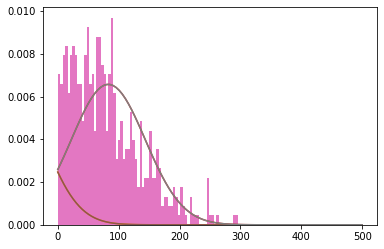

In [68]:

d = date(2018, 3, 1)
r = days_left(d)
goal = 10000
dn = days_needed(goal, date(2018, 3, 1))
with open ('model_out.txt','w') as out:
    out.write(f'Based on your income and expend date so far: {str(d)}, your money can still support you for around {int(r)} days\n')
    out.write(f'your goal is to save {goal}, based on your current financial histroy, {dn}\n')


Optimization terminated successfully.
         Current function value: 1101.988554
         Iterations: 66
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 1237.646096
         Iterations: 65
         Function evaluations: 126
It seems you are spending more money than you earn so far, try spending less to achieve your goal
None


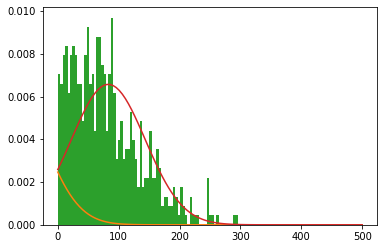